# Exploring results (FA maps) - age sq

In [21]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
import pandas as pd
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
reload(mreg)
%matplotlib inline

In [22]:
paramtype = 'FA'
analysis_name='dm_%s_agesq'%paramtype
analysis_wd = osp.join('/home/grg/spm/analysis_20170116/', analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_mask.nii'
excel_fp = '/home/grg/spm/designmat/%s.xls'%analysis_name
print 'Found SPM files:', spm

Found SPM files: ['/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/SPM.mat']


In [23]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/spm/designmat/dm_FA_agesq.xls looking up column FA ...
Analysis name: dm_FA_agesq
First column: FA
Columns in the model: [u'Apoe2-3', u'Apoe2-4', u'Apoe3-3', u'Apoe3-4', u'Apoe4-4', u'age', u'agesq', u'gender']
### Agesq identified
Analysis name: dm_FA_agesq
Scans (514): [u'/home/grg/spm/FA/10070_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10102_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10108_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10235_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10365_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10419_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10463_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10530_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10551_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10563_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10576_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10630_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10668_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10692_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10693_FA_MNIspace_s.nii', u'/home/grg/spm/FA/10703_FA_MNIspa

,contrast name,contrast type,covariate names,covariate weights
0,Age - Agesq,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 0.0]"
1,Agesq - Age,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0]"
2,Main effect Age,F,"[(Age - Agesq, T, [Apoe2-3, Apoe2-4, Apoe3-3, ...",None
3,Effect Age,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
4,Effect Agesq,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
5,Main effect Age (omnibus),F,"[(Effect Age, T, [Apoe2-3, Apoe2-4, Apoe3-3, A...",None


/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmT_0001.nii T
/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmT_0002.nii T
/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmF_0003.nii F
/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmT_0004.nii T
/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmT_0005.nii T
/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmF_0006.nii F


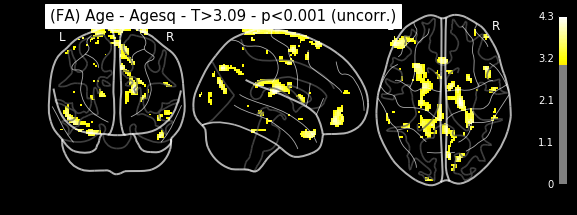

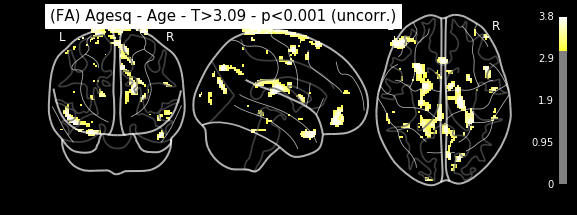

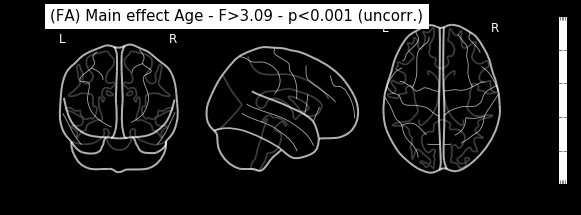

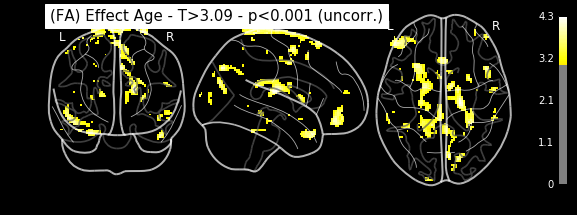

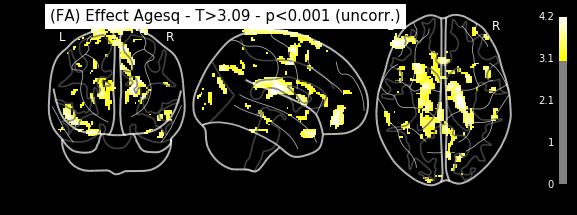

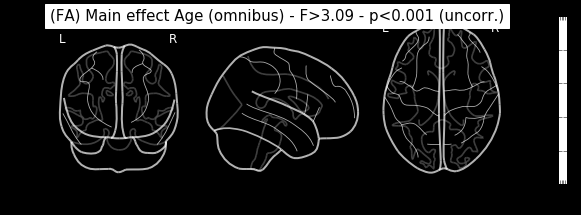

In [25]:
spm_mat_file = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))[0]
for i in range(1, len(n3.inputs.contrasts)+1):
    img = glob(osp.join(analysis_wd, 'estimatecontrasts/spm*_00%02d.nii'%i))[0]
    contrast_type = osp.split(img)[-1][3]
    print img, contrast_type
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=10)
    plotting.plot_glass_brain(img,
                      title='(%s) %s - %s>%.02f - p<0.001 (uncorr.)'%(paramtype, contrast_name, contrast_type, threshold1), colorbar=True,
                      black_bg=True, display_mode='ortho', threshold=threshold1)  
plotting.show()

/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmT_0001.nii T
Saving to... /tmp/tmpGvFQPK.png
/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmT_0002.nii T
Saving to... /tmp/tmpFwOBj6.png
/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmF_0003.nii F
Saving to... /tmp/tmpfZOBGv.png
/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmT_0004.nii T
Saving to... /tmp/tmpUCWfLC.png
/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmT_0005.nii T
Saving to... /tmp/tmp5wiH18.png
/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmF_0006.nii F
Saving to... /tmp/tmpqZyfF4.png


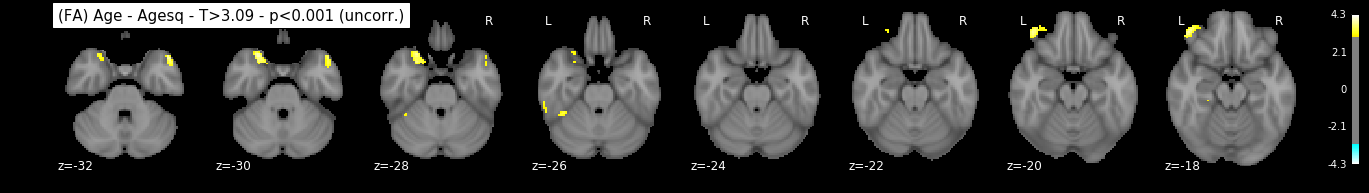

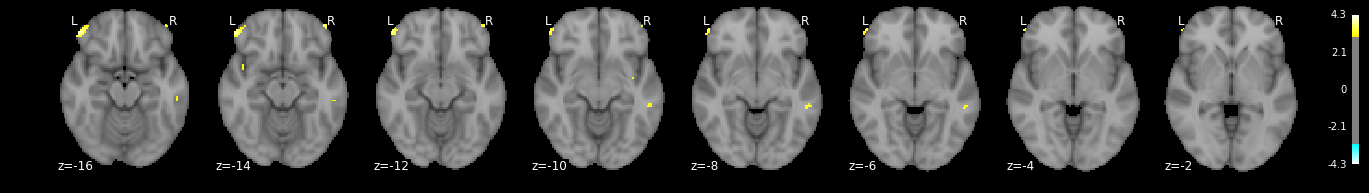

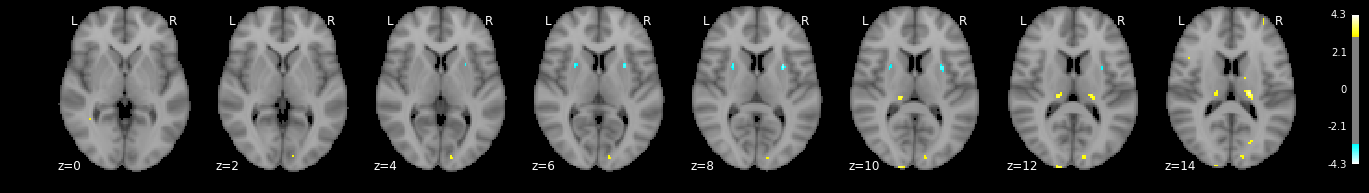

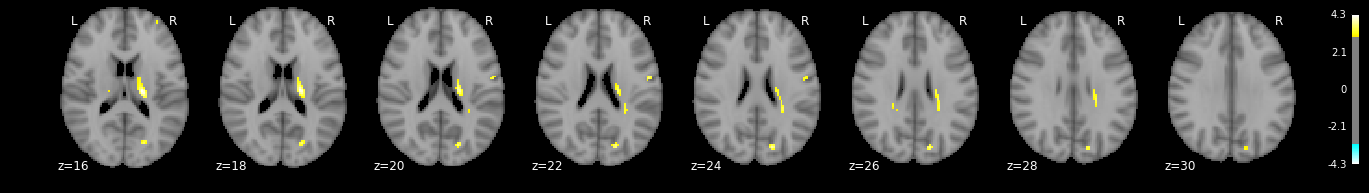

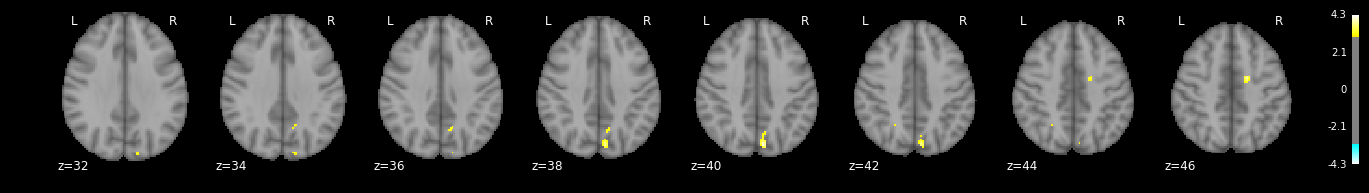

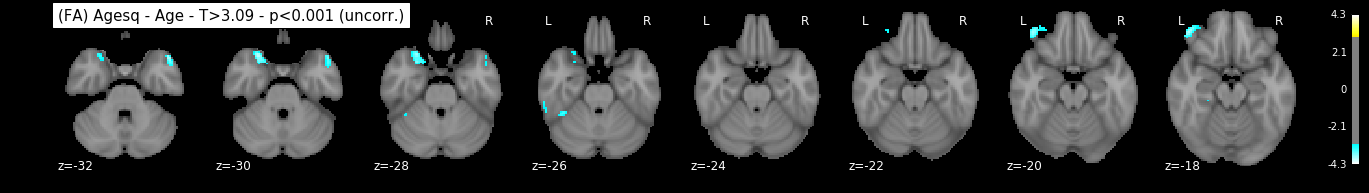

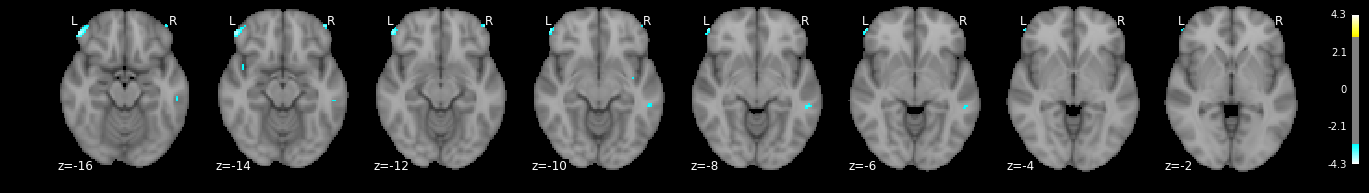

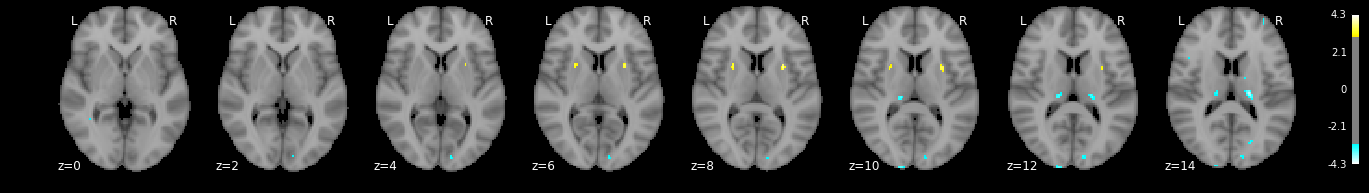

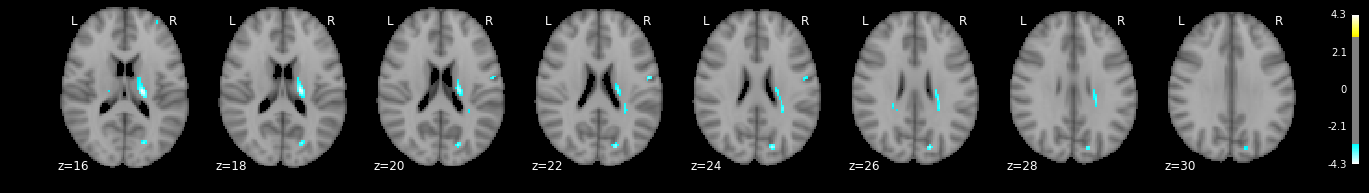

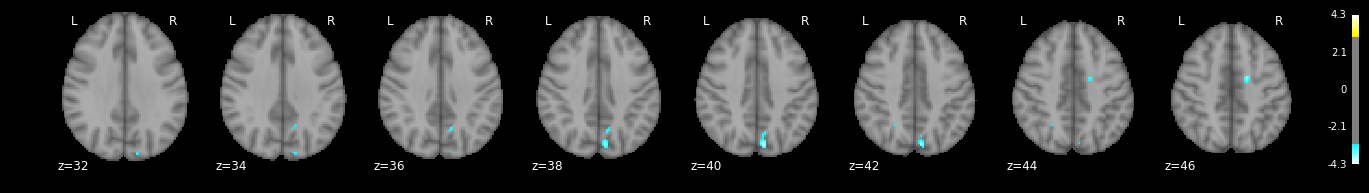

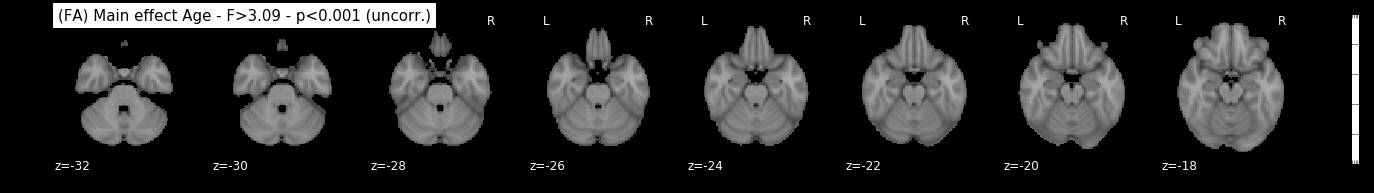

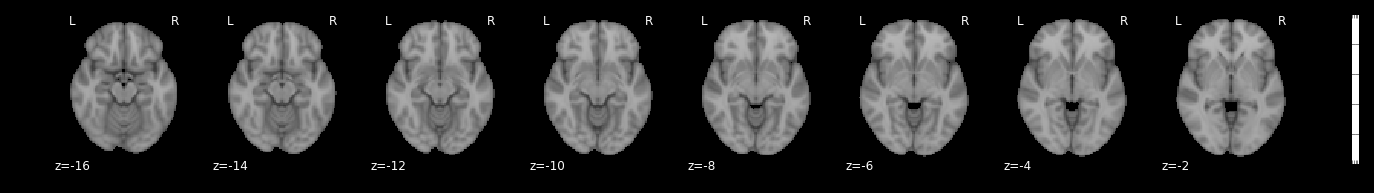

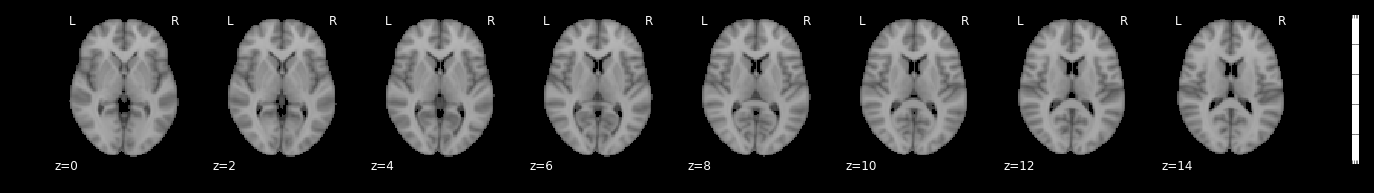

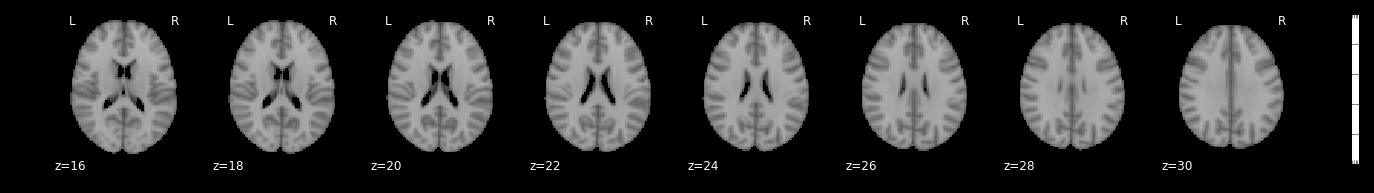

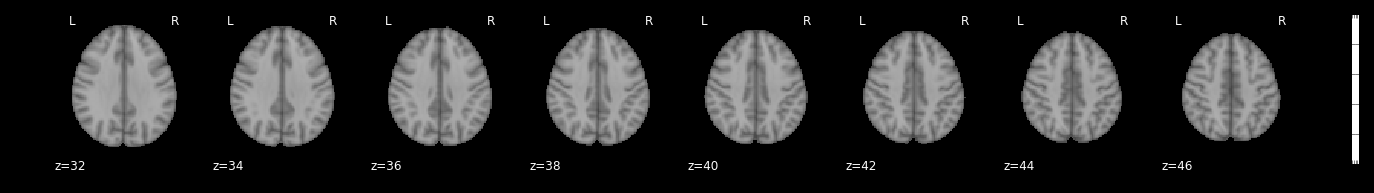

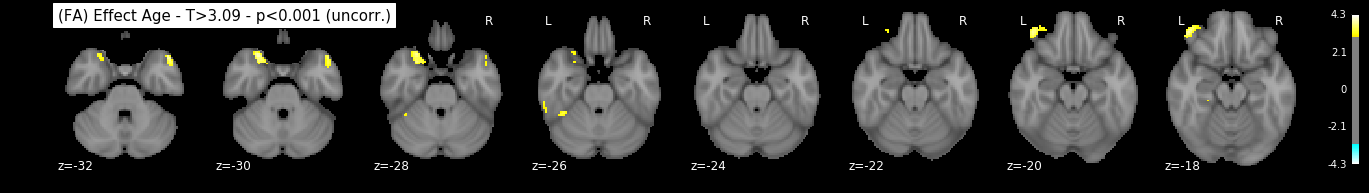

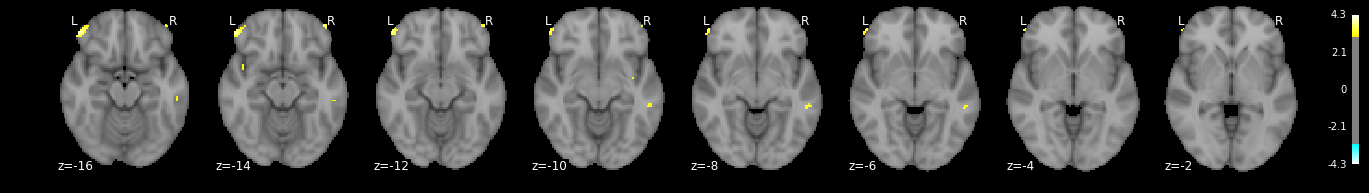

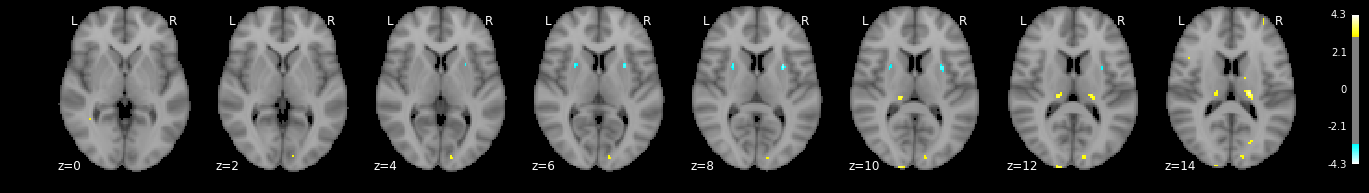

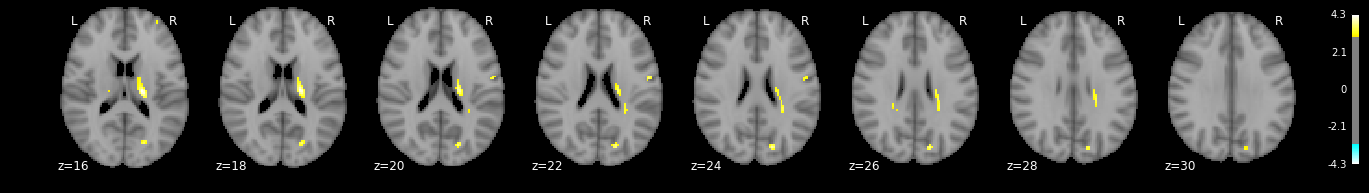

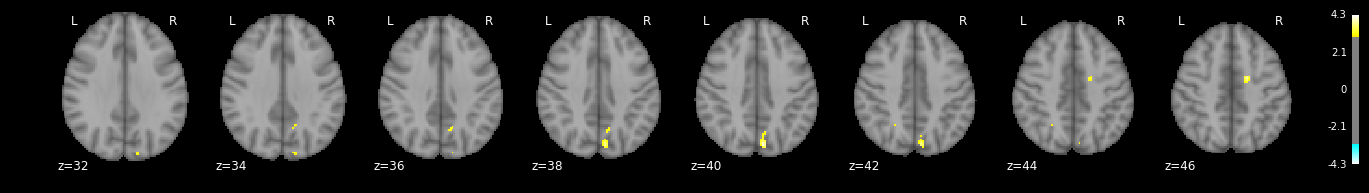

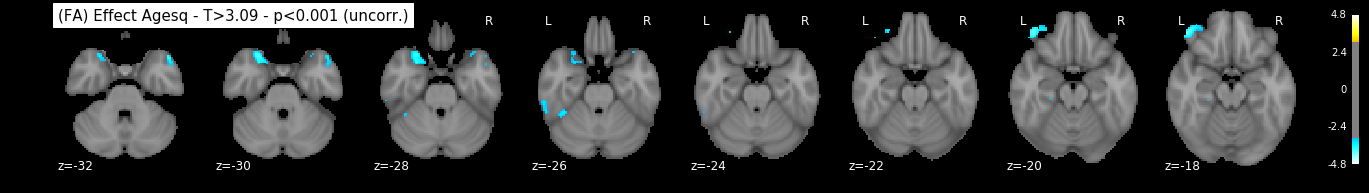

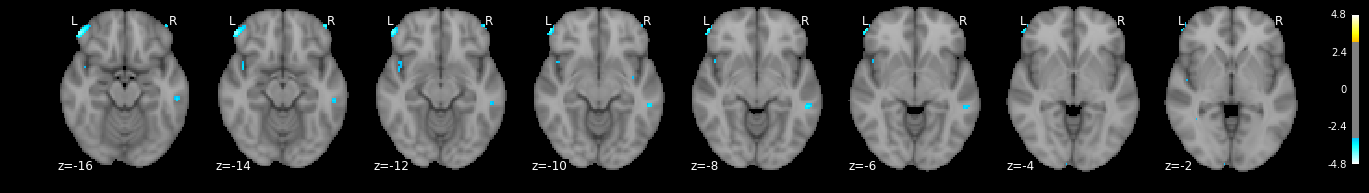

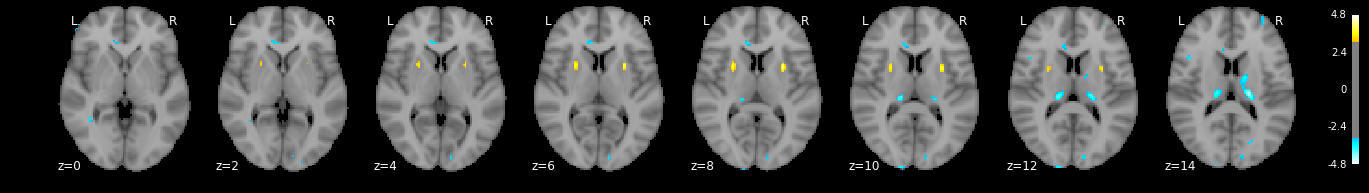

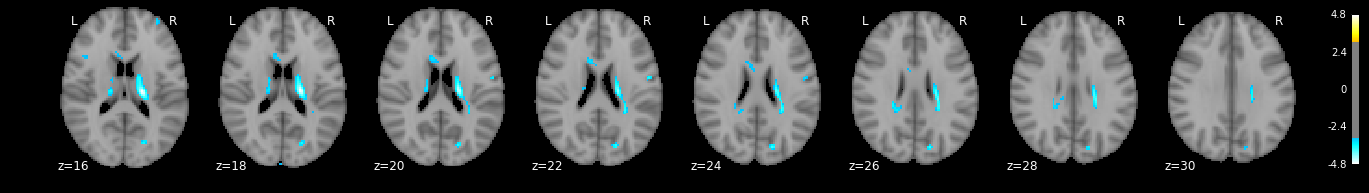

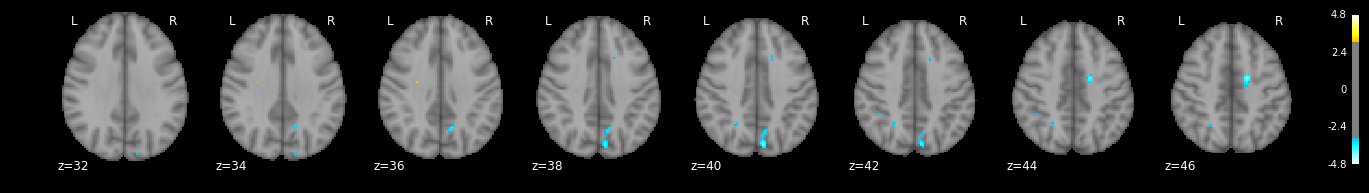

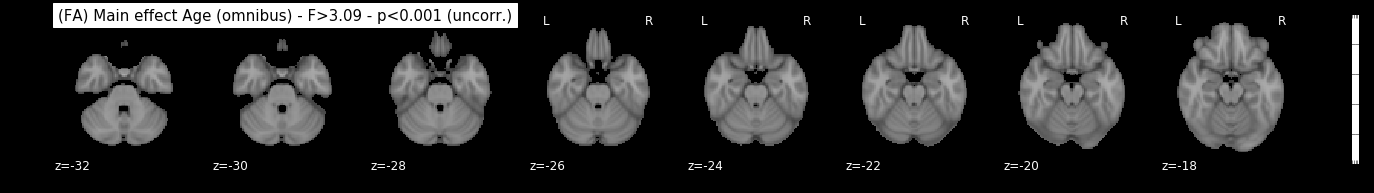

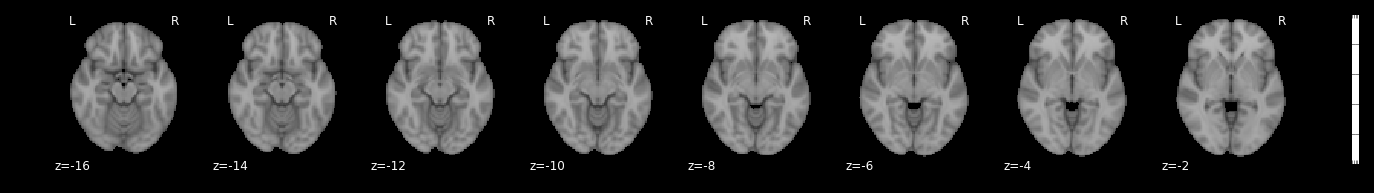

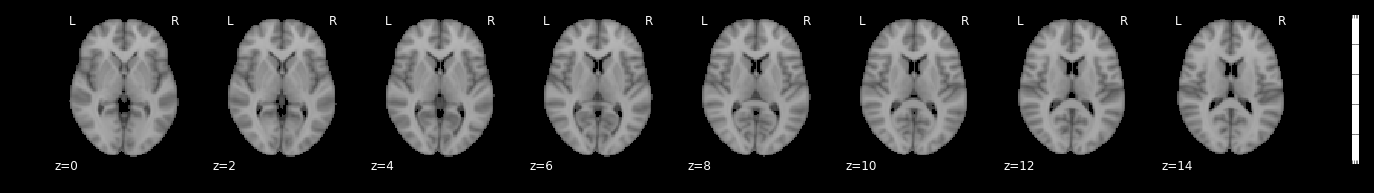

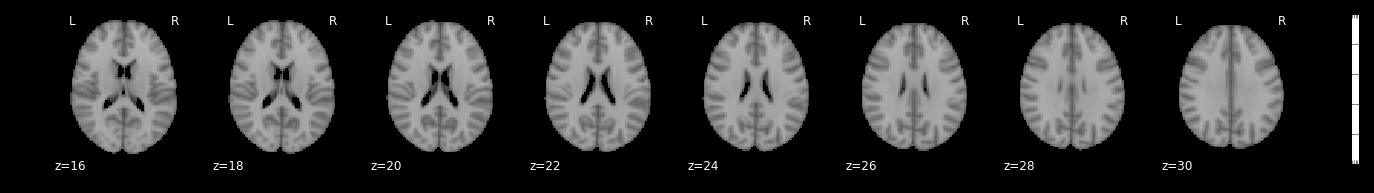

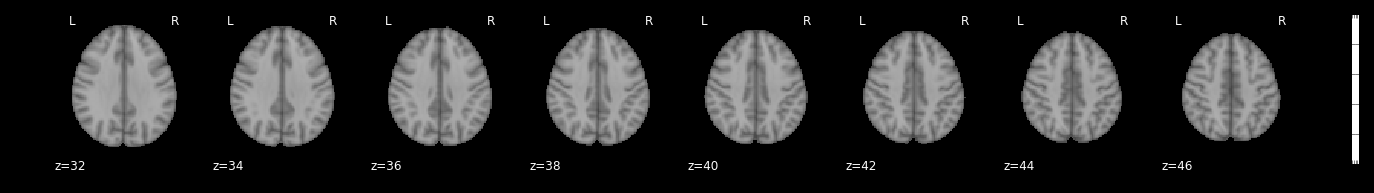

In [26]:
for i in range(1, len(n3.inputs.contrasts)+1):
    img = glob(osp.join(analysis_wd, 'estimatecontrasts/spm*_00%02d.nii'%i))[0]
    contrast_type = osp.split(img)[-1][3]
    print img, contrast_type
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=10)

    plot_stat_map(img, threshold=threshold1, row_l=8, start=-32, end=34, step=2,
                  title= '(%s) %s - %s>%.02f - p<0.001 (uncorr.)'%(paramtype, contrast_name, contrast_type, threshold1))
        
plotting.show()

/home/grg/spm/analysis_20170116/dm_FA_agesq/estimatecontrasts/spmT_0005.nii
Saving to... /tmp/tmpwilinF.png


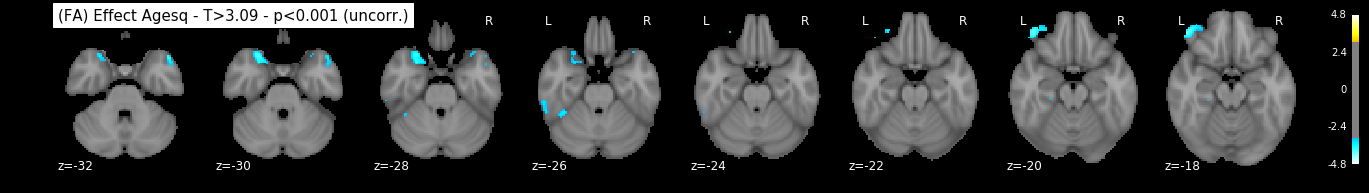

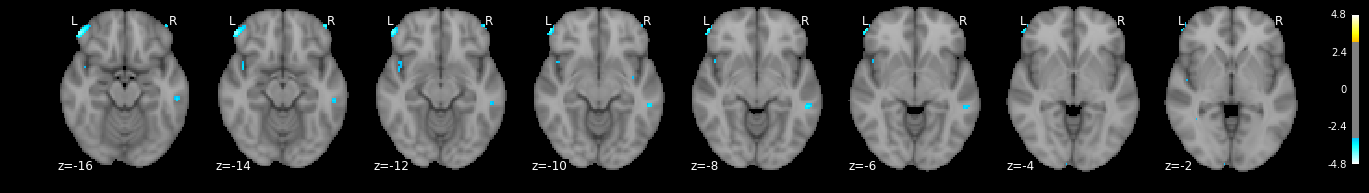

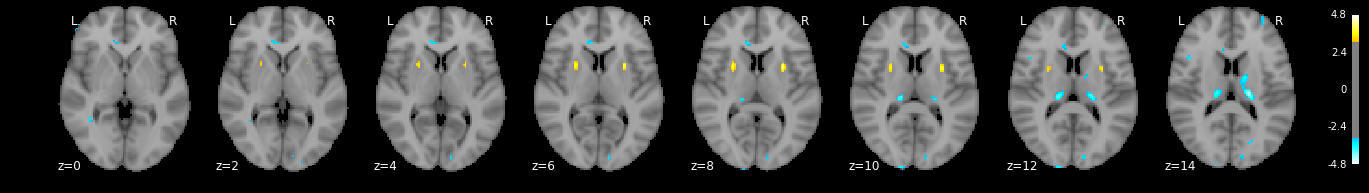

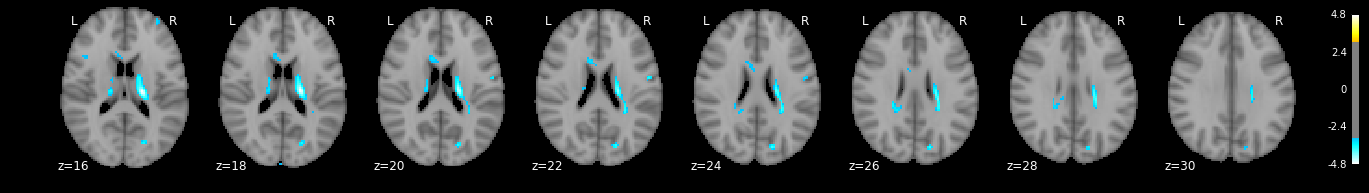

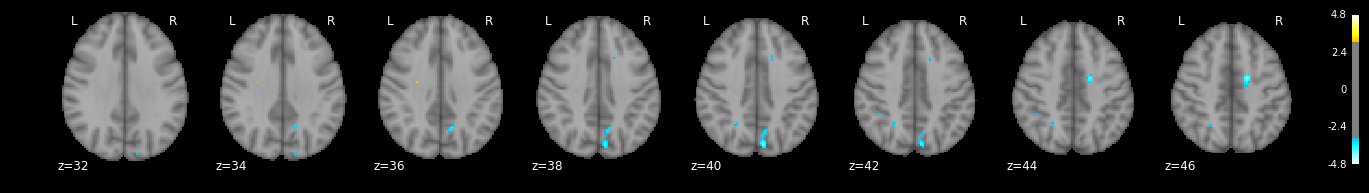

In [15]:
img = osp.join(analysis_wd, 'estimatecontrasts/spmT_0005.nii')
print img
contrast_name = n3.inputs.contrasts[i-1][0]
thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=10)

plot_stat_map(img, threshold=threshold1, row_l=8, start=-32, end=34, step=2,
                  title= '(%s) %s - T>%.02f - p<0.001 (uncorr.)'%(paramtype, contrast_name, threshold1))